In [116]:
import pandas as pd
import numpy as np
import sklearn

import os

### Импортирую db1 

In [117]:
path = os.getcwd()

In [118]:
fish_df = pd.read_csv(path + r"\data\db1\ref\fish.csv", error_bad_lines=False, sep=';')
prod_designate_df = pd.read_csv(path + r"\data\db1\ref\prod_designate.csv", error_bad_lines=False, sep=';')
prod_type_df = pd.read_csv(path + r"\data\db1\ref\prod_type.csv", error_bad_lines=False, sep=';')
regime_df = pd.read_csv(path + r"\data\db1\ref\regime.csv", error_bad_lines=False, sep=';')
region_df = pd.read_csv(path + r"\data\db1\ref\region.csv", error_bad_lines=False, sep=';')

In [119]:
catch_df = pd.read_csv(path + r'\data\db1\catch.csv', error_bad_lines=False, sep=',')
product_df = pd.read_csv(path + r'\data\db1\product.csv', error_bad_lines=False, sep=',')

## Обзор данных

### Support data

In [120]:
fish_df.head(5)

,id_fish,fish
0,0,Не определен
1,1,макруронус
2,2,Рыбы и морепродукты
3,3,Рыбы
4,4,сельди


In [121]:
prod_designate_df.head(5)

,id_prod_designate,prod_designate
0,0,не определен
1,1,"рыбопродукция, выпущенная из собственного сырь..."
2,3,"рыбопродукция, принятая для транспортировки"
3,4,"рыбопродукция, принятая (купленная) для промпе..."
4,5,"рыбопродукция из собств сырья, предназн для пр..."


In [122]:
prod_type_df.head(5)

,id_prod_type,prod_type,id_fish,prod_type_full
0,6060,Рыба охлажденная,2,рыба охлажденная
1,9420,альгинат натрия,29,альгинат натрия
2,6010,Пряный посол и маринады,2,пряный посол и маринады
3,6490,икра прочих рыб,2,икра прочих рыб
4,8302,"Рыба, морепродукты и отходы от разделки рыбы д...",2,рыба морепродукты и отходы от разделки рыбы дл...


In [123]:
regime_df.head(5)

,id_regime,regime
0,0,не определен
1,1,промышленный лов
2,3,научные исследования
3,12,прибрежное рыболовство
4,15,промысел для РФ по международным договорам


In [124]:
region_df.head(5)

,id_region,region
0,7010,Бирма
1,7009,Бенин
2,7008,Бельгия
3,7007,Барбадос
4,7006,Бангладеш


In [125]:
product_df


,id_ves,date,id_prod_designate,id_prod_type,prod_volume,prod_board_volume
0,1491364,2022-01-01,1,10128,0.102,8.234
1,7014122,2022-01-01,3,3901,0.000,42.780
2,8958321,2022-01-01,1,1113,0.000,0.050
3,8958321,2022-01-01,1,1135,0.000,4.300
4,8958321,2022-01-01,1,4648,0.000,0.225
...,...,...,...,...,...,...
395066,3156205,2022-04-20,1,1027,0.000,0.000
395067,3156205,2022-04-20,1,1055,0.000,0.000
395068,2467785,2022-04-20,1,9661,0.044,5.589
395069,2467785,2022-04-20,1,9660,9.394,72.115


## Main data

### Подмена ID на текстовое название рыбы + приведение к нормальному виду

In [126]:
def spoofing(id):
    return fish_df[fish_df['id_fish'] == id]['fish'].values[0]
catch_df['fish'] = catch_df['id_fish'].apply(spoofing)
catch_df['catch_volume'] = catch_df['catch_volume']*1000

catch_df

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own,fish
0,4524386,2022-01-01,272,400,31874.00,41,852296,7115834,минтай
1,474886,2022-01-01,277,886,476.00,1,5401178,1809581,краб-стригун красный
2,3160994,2022-01-01,116,409,26310.00,15,3869431,5258490,путассу (северная)
3,1234400,2022-01-01,272,292,9541.00,1,2169057,1809581,треска
4,1234400,2022-01-01,272,113,62.00,1,2169057,1809581,палтус черный
...,...,...,...,...,...,...,...,...,...
85082,4992471,2022-04-20,108,410,1166.00,18,1518104,8379463,сайда
85083,7645033,2022-04-20,265,292,1345.00,97,1750243,1002633,треска
85084,5951077,2022-04-20,507,113,4.00,97,5099847,440996,палтус черный
85085,5292474,2022-04-20,206,147,505.05,97,229919,7829965,окунь золотистый


### Импортирую db2


In [127]:
ext1 = pd.read_csv(path + r"\data\db2\Ext.csv", error_bad_lines=False, sep=',')
ext2 = pd.read_csv(path + r"\data\db2\Ext2.csv", error_bad_lines=False, sep=',')
ext2['date_vsd'] = ext2['date_vsd'].apply(lambda x: x[:10])

In [128]:
print(len(ext1))
ext1.head(5)

3260798


,id_fishery,id_own,date_fishery,numPart,id_Plat,id_vsd,Name_Plat,Product_period,Region_Plat
0,2208303,6493928,2022-05-24 00:00:00,\N,5022636,8745666,\N,\N,\N
1,5538439,3846064,2022-05-24 00:00:00,\N,839830,3846313,\N,\N,\N
2,8688535,3107158,2022-05-24 00:00:00,\N,9310751,5215676,\N,\N,\N
3,8688535,3107158,2022-05-24 00:00:00,\N,9310751,4008716,\N,\N,\N
4,9102536,6493928,2022-05-24 00:00:00,\N,2900344,8522784,\N,\N,\N


In [129]:
print(len(ext2))
ext2.head(5)

3115280


,id_vsd,num_vsd,id_fish,fish,date_vsd,volume,unit
0,7230988,8934601,400,минтай,2022-01-01,75480,\N
1,3420538,1439843,400,минтай,2022-01-01,62586,\N
2,9509257,342637,292,треска,2022-01-01,1155,\N
3,1894307,1801854,400,минтай,2022-01-01,111048,\N
4,9410489,3126516,88,окунь-клювач,2022-01-01,1844,\N


In [130]:
ext2['id_fish'].value_counts()

-1      3052828
 292      10716
 408       6585
 400       6318
 610       4454
         ...   
 863          1
 302          1
 383          1
 713          1
 469          1
Name: id_fish, Length: 79, dtype: int64

### Визуализирую датасет

<AxesSubplot:>

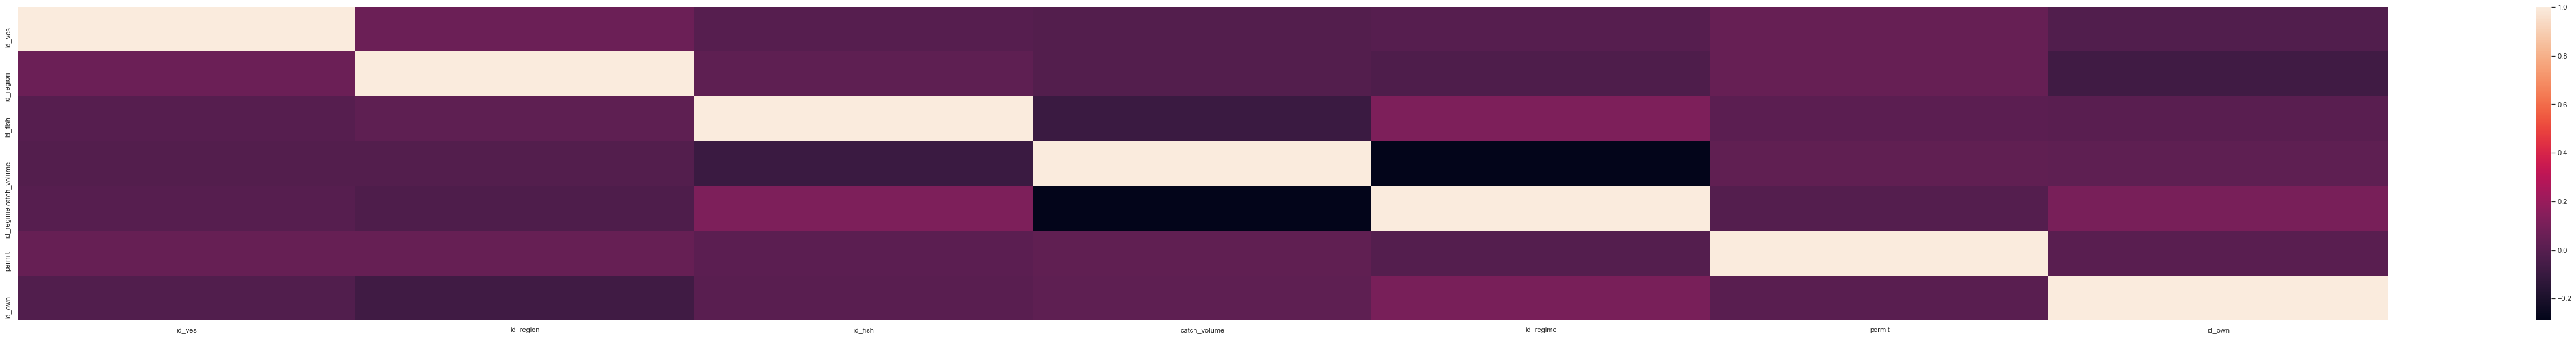

In [131]:
import seaborn as sns
sns.heatmap(catch_df.corr())

### Сравнительный анализ общих продаж по дням 

In [139]:
dates = catch_df['date'].unique()
Y = dates.copy()
Total_X1 = []
Total_X2 = []

fish =  fish_df[fish_df['id_fish'] == 400]['fish'].values[0]
X1 = catch_df[catch_df['fish'] == fish]
X2 = ext2[ext2['fish'] == fish]

for date in dates:
    X1_dated = X1[X1['date'] == date]['catch_volume'].sum()
    X2_dated = X2[X2['date_vsd'] == date]['volume'].sum()
    
    Total_X1.append(X1_dated)
    Total_X2.append(X2_dated)

In [140]:
hue = []
total_x = []
total_x.extend(Total_X1)
total_x.extend(Total_X2)
for x in total_x:
    if x in Total_X1:
        hue.append('Поймано')
    elif x in Total_X2:
        hue.append('Передано')
new_dates = []
new_dates.extend(dates)
new_dates.extend(dates)
new_dates = [x[5:] for x in new_dates]

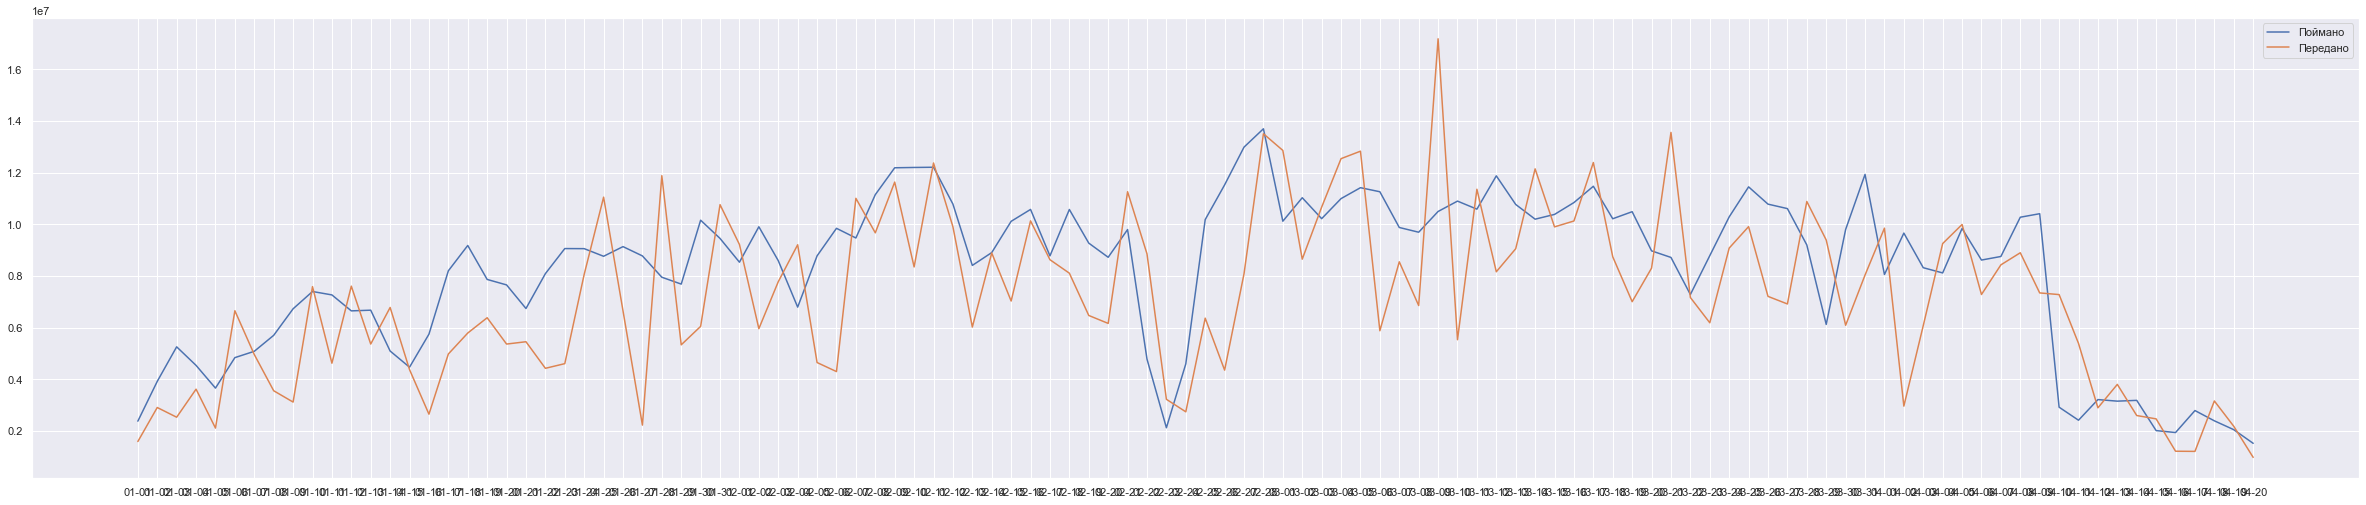

In [145]:
sns.lineplot(y=total_x, x=new_dates, hue=hue, )
sns.set(rc={'figure.figsize':(40.7,40.87)})

In [143]:
comparing_data = []
comparing_date = []
comparing_hue = []

for index in range(len(Total_X1)):
    if Total_X1[index] < Total_X2[index]:
        comparing_data.append(Total_X1[index])
        comparing_data.append(Total_X2[index])
        comparing_date.append(dates[index][5:])
        comparing_date.append(dates[index][5:])
        comparing_hue.append('Поймано')
        comparing_hue.append('Передано')
        

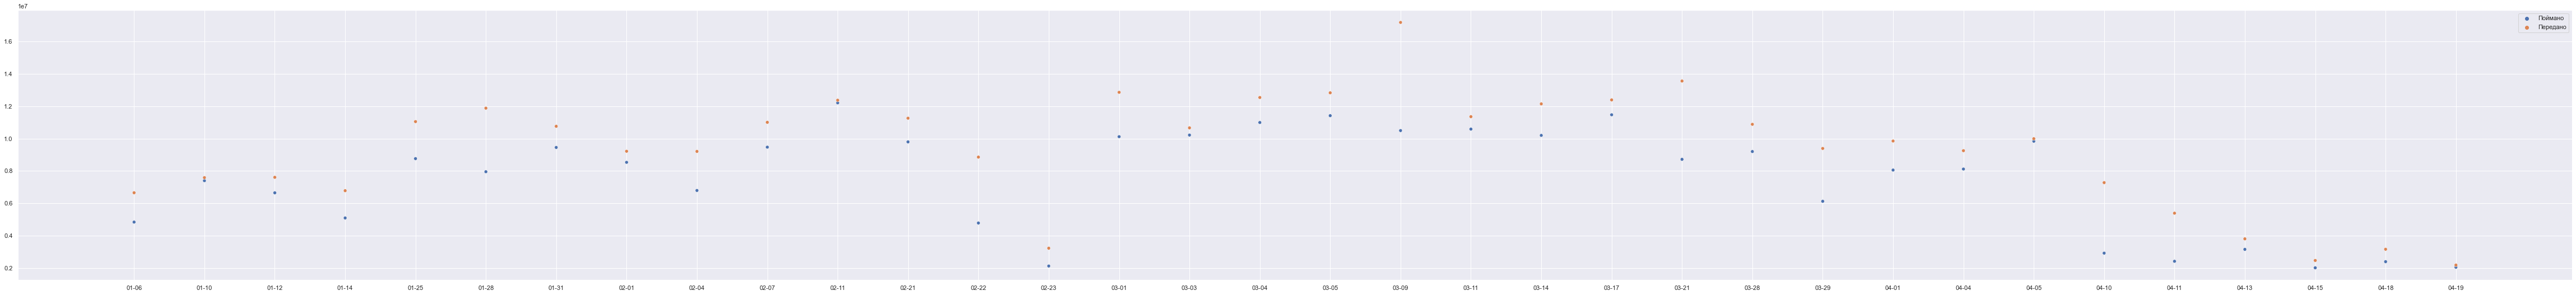

In [144]:
sns.scatterplot(y=comparing_data, x=comparing_date, hue=comparing_hue)
sns.set(rc={'figure.figsize':(41.7,8.47)})

#### Как показывает анализ, даже в обезличенных данных присутсвуют аномалии

### Добываем данные с учетом ID владельцев

In [137]:
# Сводная таблица по всем поступлениям согласно IdFish и выбранного промежутка времени.
def calculatingSummOfFish(fish_id, date_start, date_end):
    # смотрим по всем выловам этой рыбы
    data = catch_df[catch_df['id_fish'] == fish_id]
    # уникальные номера кораблей ловящих только эту рыбу
    ships = list(set(data['id_ves'].to_list()))
    
    # создаю датафрейм с владельцами и выловом по судам    
    total_df = pd.DataFrame()
    
    total_ships = []
    total_owners = []
    total_catches = []
    
    # добавляем в общую кашу дату и документируем владельцев
    for ship in ships:
        ship_data = data[data['id_ves'] == ship]
        owners = list(set(ship_data['id_own'].to_list()))
        
        for owner in owners:
            ship_owner_data = ship_data[ship_data['id_own'] == owner]
            
            try:
                ship_owner_end_data = ship_owner_data[ship_owner_data['date'] < date_end]
                ship_owner_start_end_data = ship_owner_end_data[ship_owner_end_data['date'] > date_start]
                total_catch = ship_owner_start_end_data['catch_volume'].sum()
            except e:
                print(e)
            
            if total_catch > 0:
                total_catches.append(total_catch)
                total_ships.append(ship)
                total_owners.append(owner)
            
    total_df['total_catches'] = total_catches
    total_df['ship'] = total_ships
    total_df['owner'] = total_owners
    
    return total_df

### Используем в перспективе, но не в качестве MVP